In [29]:
%matplotlib inline

# scitnific computing and plotting
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
import os

# HDDM related packages
import pymc as pm
import hddm
import kabuki
import arviz as az
print("The current HDDM version is: ", hddm.__version__)
print("The current kabuki version is: ", kabuki.__version__)
print("The current PyMC version is: ", pm.__version__)
print("The current ArviZ version is: ", az.__version__)


The current HDDM version is:  1.0.1RC
The current kabuki version is:  0.6.5RC4
The current PyMC version is:  2.3.8
The current ArviZ version is:  0.15.1


In [30]:
savePath = '../results/hddm/'
os.makedirs(savePath, exist_ok=True)

In [31]:
data = hddm.load_csv('../data/data_behavior_full.csv')

data.rename(columns={'probe_accuracy':'response'}, inplace=True)
data.rename(columns={'probe_rt':'rt'}, inplace=True)
data.rename(columns={'cue_dimensionality':'dim'}, inplace=True)

data.tail()

,response,rt,probe_attribute,dim,probe_leftrightwin,cue_color,cue_direction,cue_size,cue_luminance,subj_idx
10394,1,0.58771,1,1,1,1,1,1,1,1281
10395,1,0.59754,1,1,2,1,1,1,1,1281
10396,1,0.42654,1,1,2,1,1,1,1,1281
10397,1,0.66648,1,1,1,1,1,1,1,1281
10398,0,0.54142,1,1,2,1,1,1,1,1281


In [32]:
dataFlipped = hddm.utils.flip_errors(data)

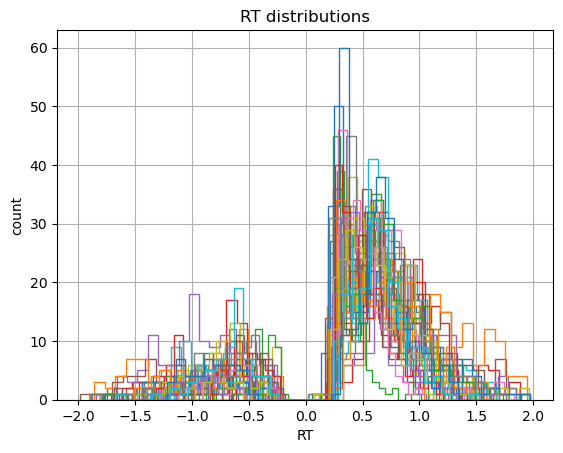

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
for i, subj_data in dataFlipped.groupby('subj_idx'):
    subj_data.rt.hist(bins=40, histtype='step', ax=ax)

In [37]:
df = data.copy()


# Model setting
m_v = hddm.HDDM(df, include=['a', 'v', 't','z'], depends_on={'v': 'dim'})

m_v_a = hddm.HDDM(df, include=['a', 'v', 't','z'], depends_on={'v': 'dim','a': 'dim'})

m_v_t = hddm.HDDM(df, include=['a', 'v', 't','z'], depends_on={'v': 'dim','t': 'dim'})

m_v_t_A_a = hddm.HDDM(df, include=['a', 'v', 't','z'], depends_on={'v': 'dim','t': 'dim','a': 'dim'})


No model attribute --> setting up standard HDDM
Set model to ddm
No model attribute --> setting up standard HDDM
Set model to ddm
No model attribute --> setting up standard HDDM
Set model to ddm
No model attribute --> setting up standard HDDM
Set model to ddm


In [38]:
def run_sampling(
    m,
    n_samples=7000,
    n_burn=5000,
    n_chains=4,
    model_name="m",
    progress_bar=True,
):
    """
    Run Markov Chain Monte Carlo (MCMC) sampling for a given model and parameters.
    This function takes a model parameter `m` and runs MCMC sampling using PyMC2.3.8.
    It returns a arviz InferenceData object containing the posterior samples and post-fit model.
    Parameters
    ----------
    m : object
        The model parameter to be sampled.
    n_samples : int, optional
        The number of posterior samples to generate. Default is 10000.
    n_burn : int, optional
        The number of initial samples to discard. Default is 5000.
    n_chains : int, optional
        The number of MCMC chains to run in parallel. Default is 4.
    model_name : str, optional
        The name of the model to be used in the sampling process. Default is "m".
    progress_bar : boolean, optional
        Default=True. Set False hide sampling progress bar. 
    Returns
    -------
    InferenceData : arviz.InferenceData
        A trace object containing the posterior samples.
    Model: HDDM
        A post-fit HDDM model. 
    """

    m_infdata = m.sample(n_samples,
                         burn=n_burn,
                         chains=n_chains,
                         return_infdata=True,
                         save_name="model_fitted/" + model_name,
                         progress_bar=progress_bar,
                         return_infdata = True,
                         sample_prior = True, loglike = True, ppc = True)

    return m, m_infdata

In [39]:
m_v, m_v_infdata = run_sampling(m_v)
m_v_a, m_v_a_infdata = run_sampling(m_v_a)
m_v_t, m_v_t_infdata = run_sampling(m_v_t)
m_v_t_A_a , m_v_t_A_a_infdata = run_sampling(m_v_t_A_a )

/opt/conda/lib/python3.9/site-packages/scipy/optimize/_optimize.py:2309: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/opt/conda/lib/python3.9/site-packages/scipy/optimize/_optimize.py:2309: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/opt/conda/lib/python3.9/site-packages/scipy/optimize/_optimize.py:2309: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/opt/conda/lib/python3.9/site-packages/scipy/optimize/_optimize.py:2309: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


[                  0%                  ] 6 of 7000 complete in 0.6 sec
[                  0%                  ] 11 of 7000 complete in 1.1 sec
[                  0%                  ] 16 of 7000 complete in 1.6 sec
[                  0%                  ] 21 of 7000 complete in 2.2 sec
[                  0%                  ] 25 of 7000 complete in 2.7 sec
[                  0%                  ] 30 of 7000 complete in 3.2 sec
[                  0%                  ] 35 of 7000 complete in 3.8 sec
[                  0%                  ] 40 of 7000 complete in 4.4 sec
[                  0%                  ] 45 of 7000 complete in 4.9 sec
[                  0%                  ] 50 of 7000 complete in 5.5 sec
[                  0%                  ] 55 of 7000 complete in 6.0 sec
[                  0%                  ] 60 of 7000 complete in 6.6 sec
[                  0%                  ] 65 of 7000 complete in 7.1 sec
[                  0%                  ] 69 of 7000 complete in 7

KeyboardInterrupt: 